In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import time
import matplotlib.pyplot as plt
import random

In [2]:
from src.data.make_dataset import make_dataset
from src.data.dataset_loaders import VehiculesDatasetLoader
from src.data.image_loaders import VehiculesSquareImageLoader, VehiculesFixedSizeImageLoader
from src.features.pipelines import RawImageToImage
from src.features.processors import NormImage, Resize
from src.features.descriptors import HOGDescriptor, LBPDescriptor
from src.models.detectors import SliderDetector
from src.data.sliders import SlidingWindow

In [3]:
DATASET_PATH = './../../../data/raw/vehicules/'
WORKERS = 7

In [5]:
dataset_loader = VehiculesDatasetLoader(
    image_loader=VehiculesSquareImageLoader()
)

# dataset_loader = VehiculesDatasetLoader(
#     image_loader=VehiculesFixedSizeImageLoader((64, 64))
# )

images = dataset_loader.load_dataset(
    input_folder_filepath=DATASET_PATH,
    images_files_types=('png',),
    annotations_files_types=('txt',),
    verbose=True
)

100%|██████████| 3813/3813 [00:47<00:00, 80.71it/s]


In [6]:
len(images)

668

In [7]:
bndb = []
for image in images:
    for b in image.bnd_boxes:
        bndb.append(b)

len(bndb)

1265

In [8]:
resize = Resize(output_size=(64, 64))

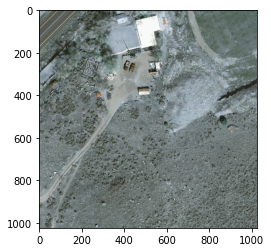

In [9]:
plt.imshow(images[1].image)

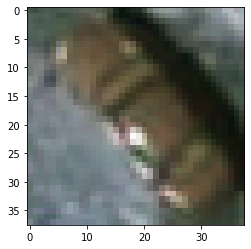

In [10]:
plt.imshow(images[1].get_car(images[1].bnd_boxes[0]))

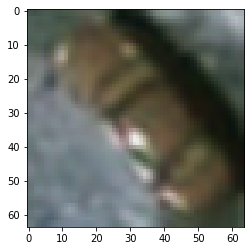

In [11]:
plt.imshow(resize.process(images[1].get_car(images[1].bnd_boxes[0])))

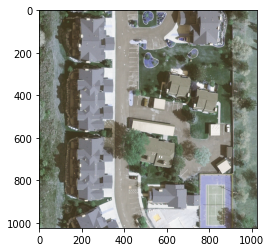

In [12]:
plt.imshow(images[8].image)

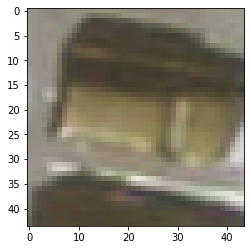

In [13]:
plt.imshow(images[8].get_car(images[8].bnd_boxes[0]))

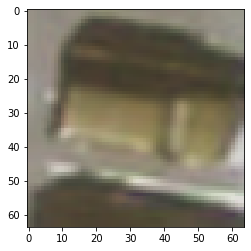

In [14]:
plt.imshow(resize.process(images[8].get_car(images[8].bnd_boxes[0])))

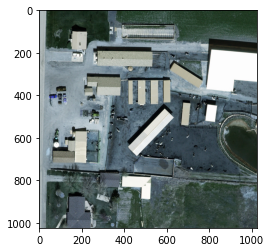

In [15]:
plt.imshow(images[9].image)

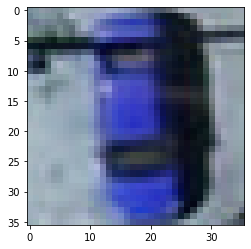

In [16]:
plt.imshow(images[9].get_car(images[9].bnd_boxes[0]))

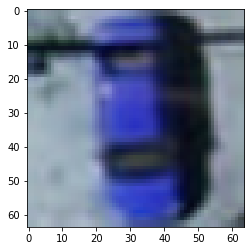

In [17]:
plt.imshow(resize.process(images[9].get_car(images[9].bnd_boxes[0])))

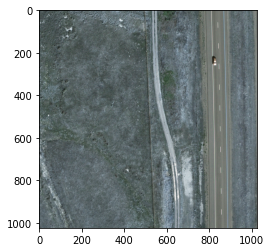

In [20]:
plt.imshow(images[40].image)

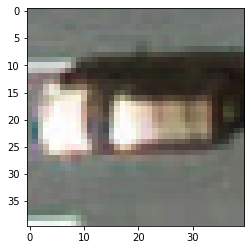

In [21]:
plt.imshow(images[40].get_car(images[40].bnd_boxes[0]))

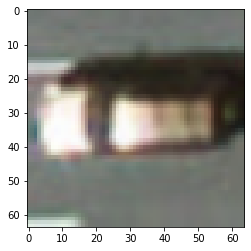

In [22]:
plt.imshow(resize.process(images[40].get_car(images[40].bnd_boxes[0])))